In [ ]:
#!pip install WordCloud

In [ ]:
import pandas as pd
import numpy as np
import time
from ast import literal_eval

import nltk
import string

from nltk.sentiment.vader  import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
sid = SentimentIntensityAnalyzer

from nltk import tokenize
from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.stem import WordNetLemmatizer
nltk.download("vader_lexicon")

nltk.download("averaged_perceptron_tagger")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

from nltk.corpus import stopwords, wordnet
stop = stopwords.words("english")

import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#**Test Data**

In [ ]:
df_test = pd.read_csv("/content/gdrive/My Drive/TAS239/TEST_sentiment_2025-02-27 20-13.csv")
pd.options.display.max_colwidth = 200

df_test.head(3)

Unnamed: 0 rotten_tomatoes_link    movie_title content_rating  genres  \
0       11898       m/solitary_man   Solitary Man              R  Comedy   
1        6343       m/how_she_move   How She Move          PG-13   Drama   
2        8176      m/love_actually  Love Actually              R  Comedy   

   release_year tomatometer_status  tomatometer_count review_status  \
0          2010    Certified-Fresh                 98        Rotten   
1          2008              Fresh                 79         Fresh   
2          2003              Fresh                220        Rotten   

                                                                                                                                                                review_content  \
0  Douglas has always been at his best when he's playing someone with no scruples... Unfortunately, not even he can do anything about the message feeling distinctly one-note.   
1                                                               The film does have great energy, and some fabulous dancing, but the script could have done with another draft.   
2                     Sitting through 128 minutes of this much aggressive charm and wit is like being mugged in slow motion by beautiful people from the pages of Vanity Fair.   

                                                  test_sentiment  \
0  {'neg': 0.135, 'neu': 0.645, 'pos': 0.22, 'compound': 0.4404}   
1   {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.6486}   
2  {'neg': 0.097, 'neu': 0.585, 'pos': 0.318, 'compound': 0.836}   

   test_compound test_sent_type  
0         0.4404       POSITIVE  
1         0.6486       POSITIVE  
2         0.8360       POSITIVE

In [ ]:
df_test.drop("Unnamed: 0", axis=1, inplace=True)
df_test.head(1)

rotten_tomatoes_link   movie_title content_rating  genres  release_year  \
0       m/solitary_man  Solitary Man              R  Comedy          2010   

  tomatometer_status  tomatometer_count review_status  \
0    Certified-Fresh                 98        Rotten   

                                                                                                                                                                review_content  \
0  Douglas has always been at his best when he's playing someone with no scruples... Unfortunately, not even he can do anything about the message feeling distinctly one-note.   

                                                  test_sentiment  \
0  {'neg': 0.135, 'neu': 0.645, 'pos': 0.22, 'compound': 0.4404}   

   test_compound test_sent_type  
0         0.4404       POSITIVE

In [ ]:
df_test = df_test[["rotten_tomatoes_link", "movie_title", "review_status", "review_content", "test_compound", "test_sent_type"]]
df_test.head(3)

rotten_tomatoes_link    movie_title review_status  \
0       m/solitary_man   Solitary Man        Rotten   
1       m/how_she_move   How She Move         Fresh   
2      m/love_actually  Love Actually        Rotten   

                                                                                                                                                                review_content  \
0  Douglas has always been at his best when he's playing someone with no scruples... Unfortunately, not even he can do anything about the message feeling distinctly one-note.   
1                                                               The film does have great energy, and some fabulous dancing, but the script could have done with another draft.   
2                     Sitting through 128 minutes of this much aggressive charm and wit is like being mugged in slow motion by beautiful people from the pages of Vanity Fair.   

   test_compound test_sent_type  
0         0.4404       POSITIVE  
1         0.6486       POSITIVE  
2         0.8360       POSITIVE

In [ ]:
print("Number of movie reviews in the dataframe: " + str(len(df_test)))

Number of movie reviews in the dataframe: 64172


In [ ]:
df_test = df_test.astype(str).apply(lambda x: x.str.lower())
df_test.head(3)

rotten_tomatoes_link    movie_title review_status  \
0       m/solitary_man   solitary man        rotten   
1       m/how_she_move   how she move         fresh   
2      m/love_actually  love actually        rotten   

                                                                                                                                                                review_content  \
0  douglas has always been at his best when he's playing someone with no scruples... unfortunately, not even he can do anything about the message feeling distinctly one-note.   
1                                                               the film does have great energy, and some fabulous dancing, but the script could have done with another draft.   
2                     sitting through 128 minutes of this much aggressive charm and wit is like being mugged in slow motion by beautiful people from the pages of vanity fair.   

  test_compound test_sent_type  
0        0.4404       positive  
1        0.6486       positive  
2         0.836       positive

In [ ]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
df_test["review_content"] = df_test["review_content"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_test["movie_title"] = df_test["movie_title"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_test.head(3)

rotten_tomatoes_link    movie_title review_status  \
0       m/solitary_man   solitary man        rotten   
1       m/how_she_move           move         fresh   
2      m/love_actually  love actually        rotten   

                                                                                                      review_content  \
0  douglas always best playing someone scruples... unfortunately, even anything message feeling distinctly one-note.   
1                                              film great energy, fabulous dancing, script could done another draft.   
2          sitting 128 minutes much aggressive charm wit like mugged slow motion beautiful people pages vanity fair.   

  test_compound test_sent_type  
0        0.4404       positive  
1        0.6486       positive  
2         0.836       positive

In [ ]:
spec_chars = ["!", "#", "$", "%", "&", "\'", "\(\)", "*", "+", "\,", "-", ".", "/", ":", ";", "<", "=", ">", "?", "@", "[", "]", "^", "_", "`", "´", "{", "}", "~"]

for char in spec_chars:
  df_test["review_content"] = df_test["review_content"].str.replace(char, '')

df_test.head(3)

rotten_tomatoes_link    movie_title review_status  \
0       m/solitary_man   solitary man        rotten   
1       m/how_she_move           move         fresh   
2      m/love_actually  love actually        rotten   

                                                                                                 review_content  \
0  douglas always best playing someone scruples unfortunately, even anything message feeling distinctly onenote   
1                                          film great energy, fabulous dancing, script could done another draft   
2      sitting 128 minutes much aggressive charm wit like mugged slow motion beautiful people pages vanity fair   

  test_compound test_sent_type  
0        0.4404       positive  
1        0.6486       positive  
2         0.836       positive

In [ ]:
df_test["review_token"] = df_test.apply(lambda row: nltk.word_tokenize(row["review_content"]), axis=1)
df_test["title_token"] = df_test.apply(lambda row: nltk.word_tokenize(row["movie_title"]), axis=1)
df_test["status_token"] = df_test.apply(lambda row: nltk.word_tokenize(row["review_status"]), axis=1)
df_test["sentiment_token"] = df_test.apply(lambda row: nltk.word_tokenize(row["test_sent_type"]), axis=1)

df_test.head(3)

rotten_tomatoes_link    movie_title review_status  \
0       m/solitary_man   solitary man        rotten   
1       m/how_she_move           move         fresh   
2      m/love_actually  love actually        rotten   

                                                                                                 review_content  \
0  douglas always best playing someone scruples unfortunately, even anything message feeling distinctly onenote   
1                                          film great energy, fabulous dancing, script could done another draft   
2      sitting 128 minutes much aggressive charm wit like mugged slow motion beautiful people pages vanity fair   

  test_compound test_sent_type  \
0        0.4404       positive   
1        0.6486       positive   
2         0.836       positive   

                                                                                                                   review_token  \
0  [douglas, always, best, playing, someone, scruples, unfortunately, ,, even, anything, message, feeling, distinctly, onenote]   
1                                           [film, great, energy, ,, fabulous, dancing, ,, script, could, done, another, draft]   
2     [sitting, 128, minutes, much, aggressive, charm, wit, like, mugged, slow, motion, beautiful, people, pages, vanity, fair]   

        title_token status_token sentiment_token  
0   [solitary, man]     [rotten]      [positive]  
1            [move]      [fresh]      [positive]  
2  [love, actually]     [rotten]      [positive]

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lmtzr = WordNetLemmatizer()

text = df_test["review_content"]

def lemmatize_text(text):
  return [lmtzr.lemmatize(w, "v") for w in w_tokenizer.tokenize(text)]
  return [lmtzr.lemmatize(w, "n") for w in w_tokenizer.tokenize(text)]
  return [lmtzr.lemmatize(w, "j") for w in w_tokenizer.tokenize(text)]
  return [lmtzr.lemmatize(w, "r") for w in w_tokenizer.tokenize(text)]

df_test["review_lemma"] = df_test["review_content"].apply(lambda v: nltk.pos_tag(nltk.word_tokenize(v)))

df_test.head(3)

rotten_tomatoes_link    movie_title review_status  \
0       m/solitary_man   solitary man        rotten   
1       m/how_she_move           move         fresh   
2      m/love_actually  love actually        rotten   

                                                                                                 review_content  \
0  douglas always best playing someone scruples unfortunately, even anything message feeling distinctly onenote   
1                                          film great energy, fabulous dancing, script could done another draft   
2      sitting 128 minutes much aggressive charm wit like mugged slow motion beautiful people pages vanity fair   

  test_compound test_sent_type  \
0        0.4404       positive   
1        0.6486       positive   
2         0.836       positive   

                                                                                                                   review_token  \
0  [douglas, always, best, playing, someone, scruples, unfortunately, ,, even, anything, message, feeling, distinctly, onenote]   
1                                           [film, great, energy, ,, fabulous, dancing, ,, script, could, done, another, draft]   
2     [sitting, 128, minutes, much, aggressive, charm, wit, like, mugged, slow, motion, beautiful, people, pages, vanity, fair]   

        title_token status_token sentiment_token  \
0   [solitary, man]     [rotten]      [positive]   
1            [move]      [fresh]      [positive]   
2  [love, actually]     [rotten]      [positive]   

                                                                                                                                                                                              review_lemma  
0  [(douglas, NNS), (always, RB), (best, JJS), (playing, VBG), (someone, NN), (scruples, NNS), (unfortunately, RB), (,, ,), (even, RB), (anything, NN), (message, NN), (feeling, VBG), (distinctly, RB)...  
1                                               [(film, NN), (great, JJ), (energy, NN), (,, ,), (fabulous, JJ), (dancing, NN), (,, ,), (script, NN), (could, MD), (done, VBN), (another, DT), (draft, NN)]  
2  [(sitting, VBG), (128, CD), (minutes, NNS), (much, RB), (aggressive, JJ), (charm, NN), (wit, NN), (like, IN), (mugged, VBD), (slow, JJ), (motion, NN), (beautiful, JJ), (people, NNS), (pages, NNS),...

There are 5971462 words in the review_content column.


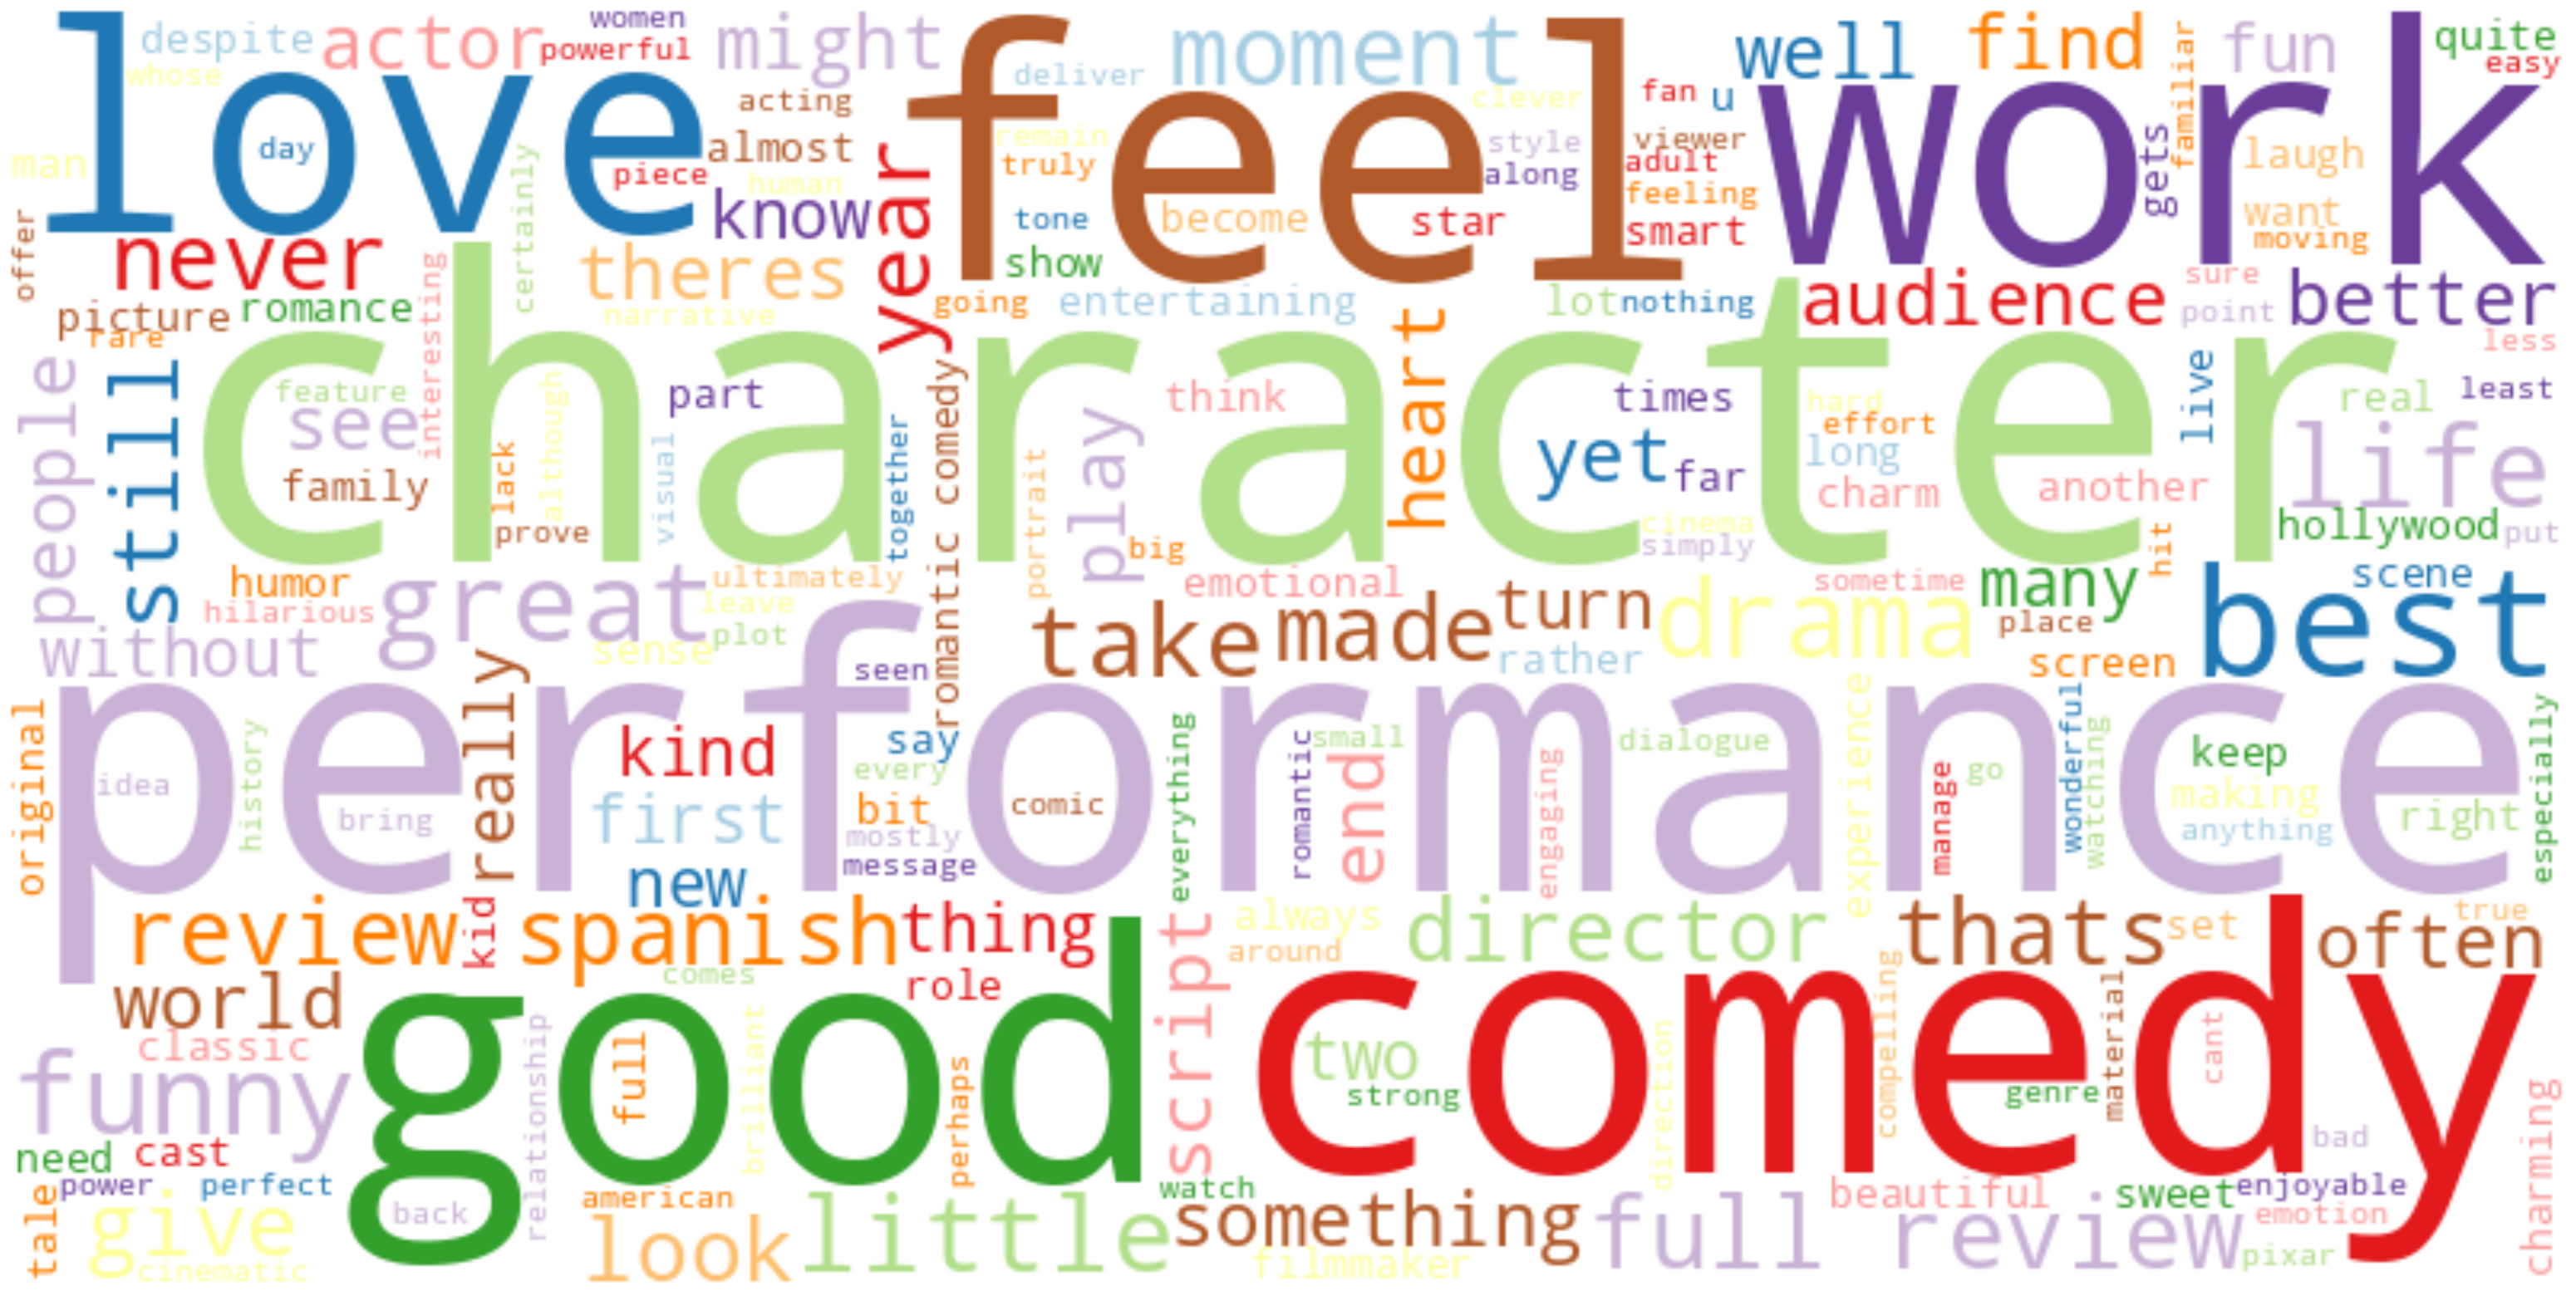

In [ ]:
STOPWORDS.update(["movie", "film", "make", "one", "story", "films", "even", "makes", "may", "time", "though", "enough", "much", "movies", "way", "seem", "seems", "come"])

lem_text = " ".join(review for review in df_test.review_content.astype(str))
print ("There are {} words in the review_content column.".format(len(lem_text)))

wordcloud = WordCloud(background_color = "white", colormap = "Paired", width = 800, height = 400, stopwords = STOPWORDS).generate(lem_text)
plt.figure(figsize = (40,20))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

plt.show()

#**Train Data**

In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/TAS239/TRAIN_sentiment_2025-02-27 20-12.csv")
pd.options.display.max_colwidth = 200

df_train.head(3)

Unnamed: 0                             rotten_tomatoes_link  \
0        4515                           m/everybody_wants_some   
1         271  m/a_bread_factory_part_one_for_the_sake_of_gold   
2        1287                             m/as_good_as_it_gets   

                                       movie_title content_rating  genres  \
0                           Everybody Wants Some!!              R  Comedy   
1  A Bread Factory, Part One: For the Sake of Gold             NR   Drama   
2                               As Good as It Gets          PG-13   Drama   

   release_year tomatometer_status  tomatometer_count review_status  \
0          2016    Certified-Fresh                240        Rotten   
1          2018              Fresh                 30         Fresh   
2          1997    Certified-Fresh                 79         Fresh   

                                                                                                                                                                                            review_content  \
0  The music is authentic, but to steal an SAT analogy, the characters are to real students as the chorus line in South Pacific was to real sailors: caricatures created to tell us things we already k...   
1                                                                                     Experiences such as this, that offer such a wealth of intellect and warmth so persistently, are few and far between.   
2                                                    How [Brooks] emerged an abler artist is worth puzzling over; I suspect it has something to do with sheer instinct triumphing over industry machinery.   

                                                  train_sentiment  \
0  {'neg': 0.084, 'neu': 0.803, 'pos': 0.113, 'compound': 0.1154}   
1    {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.8481}   
2     {'neg': 0.08, 'neu': 0.73, 'pos': 0.19, 'compound': 0.4588}   

   train_compound train_set_type  
0          0.1154       POSITIVE  
1          0.8481       POSITIVE  
2          0.4588       POSITIVE

In [ ]:
df_train.drop("Unnamed: 0", axis=1, inplace=True)
df_train.head(1)

rotten_tomatoes_link             movie_title content_rating  genres  \
0  m/everybody_wants_some  Everybody Wants Some!!              R  Comedy   

   release_year tomatometer_status  tomatometer_count review_status  \
0          2016    Certified-Fresh                240        Rotten   

                                                                                                                                                                                            review_content  \
0  The music is authentic, but to steal an SAT analogy, the characters are to real students as the chorus line in South Pacific was to real sailors: caricatures created to tell us things we already k...   

                                                  train_sentiment  \
0  {'neg': 0.084, 'neu': 0.803, 'pos': 0.113, 'compound': 0.1154}   

   train_compound train_set_type  
0          0.1154       POSITIVE

In [ ]:
df_train = df_train[["rotten_tomatoes_link", "movie_title", "review_status", "review_content", "train_compound", "train_set_type"]]
df_train.head(3)

rotten_tomatoes_link  \
0                           m/everybody_wants_some   
1  m/a_bread_factory_part_one_for_the_sake_of_gold   
2                             m/as_good_as_it_gets   

                                       movie_title review_status  \
0                           Everybody Wants Some!!        Rotten   
1  A Bread Factory, Part One: For the Sake of Gold         Fresh   
2                               As Good as It Gets         Fresh   

                                                                                                                                                                                            review_content  \
0  The music is authentic, but to steal an SAT analogy, the characters are to real students as the chorus line in South Pacific was to real sailors: caricatures created to tell us things we already k...   
1                                                                                     Experiences such as this, that offer such a wealth of intellect and warmth so persistently, are few and far between.   
2                                                    How [Brooks] emerged an abler artist is worth puzzling over; I suspect it has something to do with sheer instinct triumphing over industry machinery.   

   train_compound train_set_type  
0          0.1154       POSITIVE  
1          0.8481       POSITIVE  
2          0.4588       POSITIVE

In [ ]:
print("Number of movie reviews in this dataframe: " + str(len(df_train)))

Number of movie reviews in this dataframe: 256685


In [ ]:
df_train = df_train.astype(str).apply(lambda x: x.str.lower())
df_train.head(3)

rotten_tomatoes_link  \
0                           m/everybody_wants_some   
1  m/a_bread_factory_part_one_for_the_sake_of_gold   
2                             m/as_good_as_it_gets   

                                       movie_title review_status  \
0                           everybody wants some!!        rotten   
1  a bread factory, part one: for the sake of gold         fresh   
2                               as good as it gets         fresh   

                                                                                                                                                                                            review_content  \
0  the music is authentic, but to steal an sat analogy, the characters are to real students as the chorus line in south pacific was to real sailors: caricatures created to tell us things we already k...   
1                                                                                     experiences such as this, that offer such a wealth of intellect and warmth so persistently, are few and far between.   
2                                                    how [brooks] emerged an abler artist is worth puzzling over; i suspect it has something to do with sheer instinct triumphing over industry machinery.   

  train_compound train_set_type  
0         0.1154       positive  
1         0.8481       positive  
2         0.4588       positive

In [ ]:
df_train["review_content"] = df_train["review_content"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_train["movie_title"] = df_train["movie_title"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_train.head(3)

rotten_tomatoes_link  \
0                           m/everybody_wants_some   
1  m/a_bread_factory_part_one_for_the_sake_of_gold   
2                             m/as_good_as_it_gets   

                          movie_title review_status  \
0              everybody wants some!!        rotten   
1  bread factory, part one: sake gold         fresh   
2                           good gets         fresh   

                                                                                                                                                                        review_content  \
0  music authentic, steal sat analogy, characters real students chorus line south pacific real sailors: caricatures created tell us things already know virtues deficits callow youth.   
1                                                                                                           experiences this, offer wealth intellect warmth persistently, far between.   
2                                                                   [brooks] emerged abler artist worth puzzling over; suspect something sheer instinct triumphing industry machinery.   

  train_compound train_set_type  
0         0.1154       positive  
1         0.8481       positive  
2         0.4588       positive

In [ ]:
spec_chars = ["!", "#", "$", "%", "&", "\'", "\(\)", "*", "+", "\,", "-", ".", "/", ":", ";", "<", "=", ">", "?", "@", "[", "]", "^", "_", "`", "´", "{", "}", "~"]

for char in spec_chars:
  df_test["review_content"] = df_test["review_content"].str.replace(char, '')

df_test.head(2)

rotten_tomatoes_link   movie_title review_status  \
0       m/solitary_man  solitary man        rotten   
1       m/how_she_move          move         fresh   

                                                                                                 review_content  \
0  douglas always best playing someone scruples unfortunately, even anything message feeling distinctly onenote   
1                                          film great energy, fabulous dancing, script could done another draft   

  test_compound test_sent_type  \
0        0.4404       positive   
1        0.6486       positive   

                                                                                                                   review_token  \
0  [douglas, always, best, playing, someone, scruples, unfortunately, ,, even, anything, message, feeling, distinctly, onenote]   
1                                           [film, great, energy, ,, fabulous, dancing, ,, script, could, done, another, draft]   

       title_token status_token sentiment_token  \
0  [solitary, man]     [rotten]      [positive]   
1           [move]      [fresh]      [positive]   

                                                                                                                                                                                              review_lemma  
0  [(douglas, NNS), (always, RB), (best, JJS), (playing, VBG), (someone, NN), (scruples, NNS), (unfortunately, RB), (,, ,), (even, RB), (anything, NN), (message, NN), (feeling, VBG), (distinctly, RB)...  
1                                               [(film, NN), (great, JJ), (energy, NN), (,, ,), (fabulous, JJ), (dancing, NN), (,, ,), (script, NN), (could, MD), (done, VBN), (another, DT), (draft, NN)]

In [ ]:
df_train["review_token"] = df_test.apply(lambda row: nltk.word_tokenize(row["review_content"]), axis=1)
df_train["title_token"] = df_train.apply(lambda row: nltk.word_tokenize(row["movie_title"]), axis=1)
df_train["status_token"] = df_train.apply(lambda row: nltk.word_tokenize(row["review_status"]), axis=1)
df_train["sentiment_token"] = df_train.apply(lambda row: nltk.word_tokenize(row["train_set_type"]), axis=1)

df_train.head(3)

rotten_tomatoes_link  \
0                           m/everybody_wants_some   
1  m/a_bread_factory_part_one_for_the_sake_of_gold   
2                             m/as_good_as_it_gets   

                          movie_title review_status  \
0              everybody wants some!!        rotten   
1  bread factory, part one: sake gold         fresh   
2                           good gets         fresh   

                                                                                                                                                                        review_content  \
0  music authentic, steal sat analogy, characters real students chorus line south pacific real sailors: caricatures created tell us things already know virtues deficits callow youth.   
1                                                                                                           experiences this, offer wealth intellect warmth persistently, far between.   
2                                                                   [brooks] emerged abler artist worth puzzling over; suspect something sheer instinct triumphing industry machinery.   

  train_compound train_set_type  \
0         0.1154       positive   
1         0.8481       positive   
2         0.4588       positive   

                                                                                                                   review_token  \
0  [douglas, always, best, playing, someone, scruples, unfortunately, ,, even, anything, message, feeling, distinctly, onenote]   
1                                           [film, great, energy, ,, fabulous, dancing, ,, script, could, done, another, draft]   
2     [sitting, 128, minutes, much, aggressive, charm, wit, like, mugged, slow, motion, beautiful, people, pages, vanity, fair]   

                                     title_token status_token sentiment_token  
0                 [everybody, wants, some, !, !]     [rotten]      [positive]  
1  [bread, factory, ,, part, one, :, sake, gold]      [fresh]      [positive]  
2                                   [good, gets]      [fresh]      [positive]

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lmtzr = WordNetLemmatizer()

text = df_train["review_content"]

def lemmatize_text(text):
  return [lmtzr.lemmatize(w, "v") for w in w_tokenizer.tokenize(text)]
  return [lmtzr.lemmatize(w, "n") for w in w_tokenizer.tokenize(text)]
  return [lmtzr.lemmatize(w, "j") for w in w_tokenizer.tokenize(text)]
  return [lmtzr.lemmatize(w, "r") for w in w_tokenizer.tokenize(text)]

df_train["review_lemma"] = df_train["review_content"].apply(lambda v: nltk.pos_tag(nltk.word_tokenize(v)))

df_train.head(3)

rotten_tomatoes_link  \
0                           m/everybody_wants_some   
1  m/a_bread_factory_part_one_for_the_sake_of_gold   
2                             m/as_good_as_it_gets   

                          movie_title review_status  \
0              everybody wants some!!        rotten   
1  bread factory, part one: sake gold         fresh   
2                           good gets         fresh   

                                                                                                                                                                        review_content  \
0  music authentic, steal sat analogy, characters real students chorus line south pacific real sailors: caricatures created tell us things already know virtues deficits callow youth.   
1                                                                                                           experiences this, offer wealth intellect warmth persistently, far between.   
2                                                                   [brooks] emerged abler artist worth puzzling over; suspect something sheer instinct triumphing industry machinery.   

  train_compound train_set_type  \
0         0.1154       positive   
1         0.8481       positive   
2         0.4588       positive   

                                                                                                                   review_token  \
0  [douglas, always, best, playing, someone, scruples, unfortunately, ,, even, anything, message, feeling, distinctly, onenote]   
1                                           [film, great, energy, ,, fabulous, dancing, ,, script, could, done, another, draft]   
2     [sitting, 128, minutes, much, aggressive, charm, wit, like, mugged, slow, motion, beautiful, people, pages, vanity, fair]   

                                     title_token status_token sentiment_token  \
0                 [everybody, wants, some, !, !]     [rotten]      [positive]   
1  [bread, factory, ,, part, one, :, sake, gold]      [fresh]      [positive]   
2                                   [good, gets]      [fresh]      [positive]   

                                                                                                                                                                                              review_lemma  
0  [(music, NN), (authentic, JJ), (,, ,), (steal, JJ), (sat, JJ), (analogy, NN), (,, ,), (characters, NNS), (real, JJ), (students, NNS), (chorus, VBP), (line, NN), (south, NN), (pacific, JJ), (real, ...  
1                                        [(experiences, NNS), (this, DT), (,, ,), (offer, VBP), (wealth, NN), (intellect, NN), (warmth, NN), (persistently, RB), (,, ,), (far, RB), (between, IN), (., .)]  
2  [([, JJ), (brooks, NNS), (], VBP), (emerged, VBN), (abler, NN), (artist, NN), (worth, IN), (puzzling, VBG), (over, RP), (;, :), (suspect, JJ), (something, NN), (sheer, NN), (instinct, JJ), (triump...

There are 24590544 words in the review_content column.


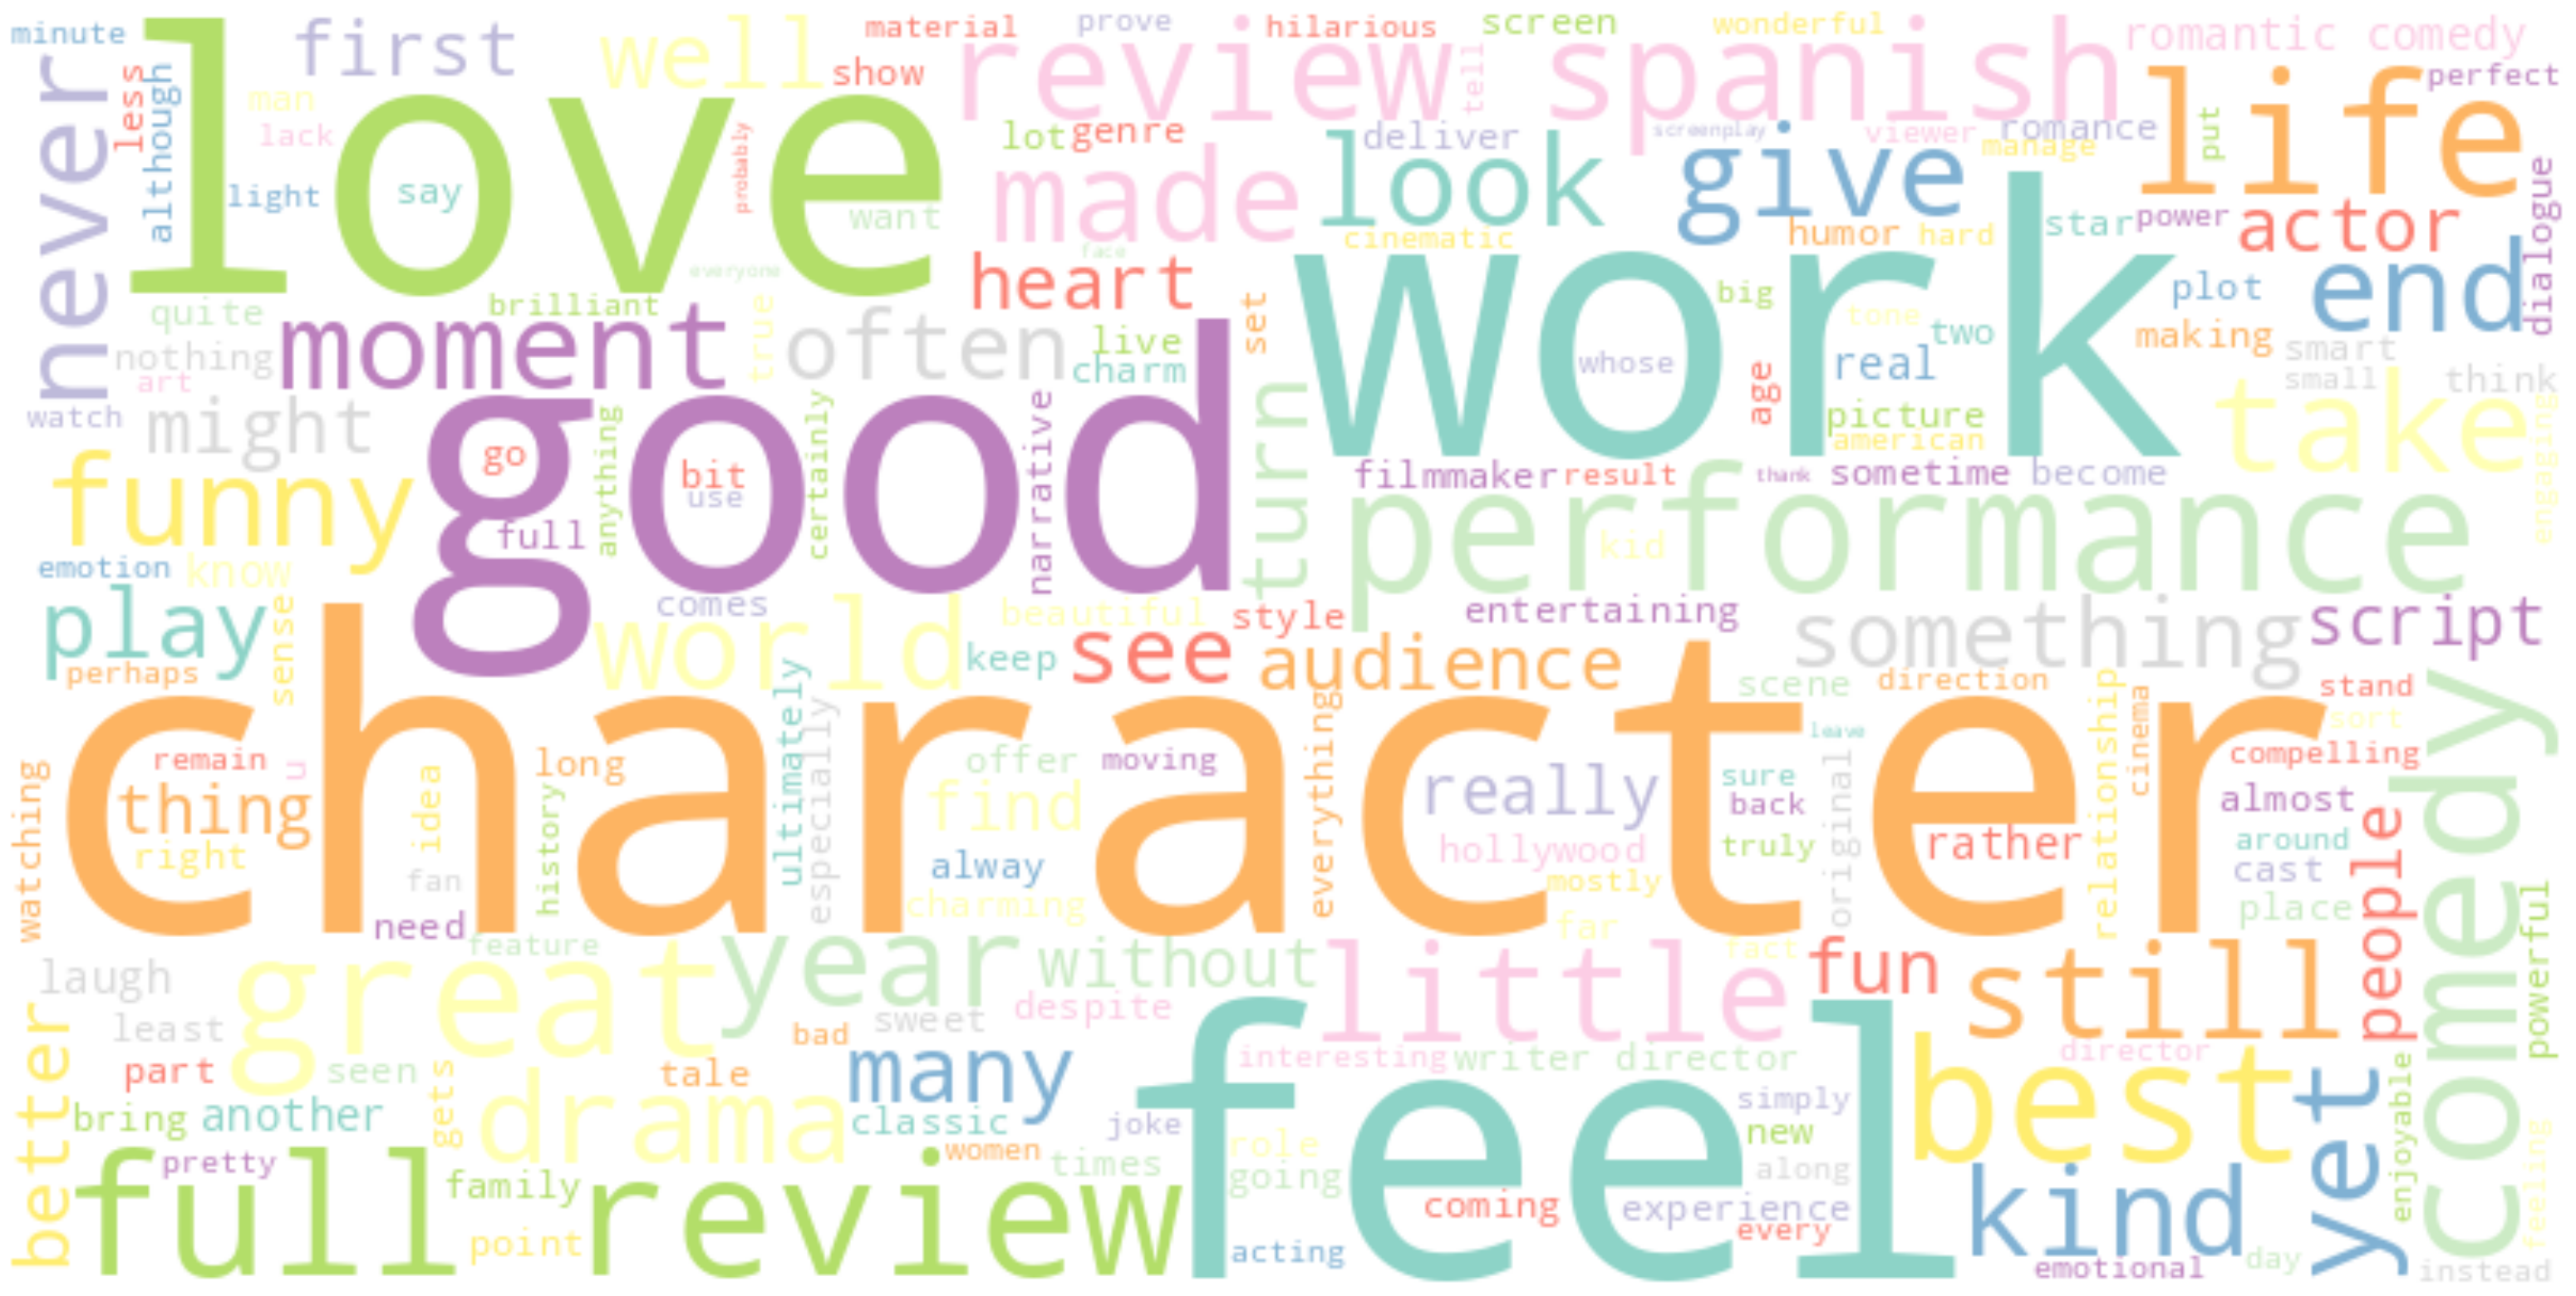

In [ ]:
STOPWORDS.update(["movie", "film", "make", "one", "story", "films", "even", "makes", "may", "time", "though", "enough", "much", "movies", "way", "seem", "seems", "come"])

lem_text = " ".join(review for review in df_train.review_content.astype(str))
print ("There are {} words in the review_content column.".format(len(lem_text)))

wordcloud = WordCloud(background_color = "white", colormap = "Set3", width = 800, height = 400, stopwords = STOPWORDS).generate(lem_text)
plt.figure(figsize = (40,20))
plt.tight_layout(pad = 0)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

plt.show()